# <center>Разработка решения для персонализиции предложения клиентам с целью увеличения их покупательской активности. </center>

<b>Задача:</b>  
Продажи в интернет-магазине начали снижаться. Необходимо удержать активность постоянных клиентов. Надо:
- промаркировать уровень финансовой активности постоянных покупателей.
- разработать решения, которые позволят персонализировать предложения постоянным клиентам,чтобы увеличить их покупательскую активность. 

- <a href='#data_preprocessing'>Предобработка данных</a>
- <a href='#eda'>Исследовательский анализ данных</a>
- <a href='#merge_tables'>Объединение таблиц</a>
- <a href='#distribution_target'>Распределение целевой переменной</a>
- <a href='#corr_analysis'>Корреляционный анализ</a>
- <a href='#use_pipeline'>Использование пайплайнов</a>
- <a href='#best_model'>Лучшая модель и её параметры</a>
- <a href='#analysis_importance_of_features'>Интерпретируемость модели</a>
- <a href='#conclusion'>Выводы</a>

In [1]:
!pip install phik -q

In [2]:
!pip install shap -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve 
from sklearn.metrics import RocCurveDisplay 

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from phik.report import plot_correlation_matrix 

RANDOM_STATE = 42
TEST_SIZE = 0.25

import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Загрузка данных

In [4]:
try :
    market_file = pd.read_csv('/datasets/market_file.csv', sep=',')
except :
    market_file = pd.read_csv('datasets/market_file.csv', sep=',')
    
try :
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',')
except :
    market_money = pd.read_csv('datasets/market_money.csv', sep=',')   
    
try :
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
except :
    market_time = pd.read_csv('datasets/market_time.csv', sep=',')  
    
try :
    money = pd.read_csv('/datasets/money.csv', sep=';')
except :
    money = pd.read_csv('datasets/money.csv', sep=';')        

In [5]:
market_file.info()
market_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [6]:
market_money.info()
market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
market_time.info()
market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


<a id='data_preprocessing'></a>
## Предобработка данных

##### market_file 
    таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем
    и его продуктовом поведении

In [9]:
# уберем верхний регистр и заменим пробелы на подчёркивания в названиях столбцов 
market_file.columns = [x.lower() for x in market_file.columns.values]
market_file.columns = [x.replace(' ','_') for x in market_file.columns.values]

In [10]:
market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [11]:
market_file['покупательская_активность'] = \
                                [x.replace(' ','_') for x in market_file['покупательская_активность'].values]
market_file['покупательская_активность'] = [x.lower() for x in market_file['покупательская_активность'].values]

In [12]:
market_file['покупательская_активность'] = market_file['покупательская_активность'].str.replace( 'Снизилась', 'снизилась')
market_file['покупательская_активность'] = market_file['покупательская_активность'].str.replace( 'Прежний уровень', 'прежний_уровень')
market_file['покупательская_активность'].unique()

array(['снизилась', 'прежний_уровень'], dtype=object)

In [13]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [14]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace( 'стандартт', 'стандарт')

In [15]:
# уберем верхний регистр, заменим пробелы на подчёркивания
market_file['популярная_категория'] = [x.lower() for x in market_file['популярная_категория'].values]
market_file['популярная_категория'] = [x.replace(' ','_') for x in market_file['популярная_категория'].values]

In [16]:
print("{:35}{}".format('Кол-во дубликатов в market_file:', market_file.duplicated().sum()))

Кол-во дубликатов в market_file:   0


In [17]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


###### market_money
    таблица с данными о выручке, которую получает магазин с покупателя, 
    то есть сколько покупатель всего потратил за период взаимодействия с сайтом

In [18]:
market_money.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

In [19]:
market_money = market_money.rename( columns={'Период':'период_зафиксирована_выручка', 'Выручка':'выручка'})

In [20]:
print("{:35}{}".format('Кол-во дубликатов в market_money:', market_money.duplicated().sum()))

Кол-во дубликатов в market_money:  0


In [21]:
market_money.head()

,id,период_зафиксирована_выручка,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


###### market_time
    таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода

In [22]:
market_time.columns

Index(['id', 'Период', 'минут'], dtype='object')

In [23]:
market_time = market_time.rename( columns={'Период':'период_фиксир_общее_время'})

In [24]:
market_time['период_фиксир_общее_время'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [25]:
market_time['период_фиксир_общее_время'] = market_time['период_фиксир_общее_время'].str.replace( 'предыдцщий_месяц', 'предыдущий_месяц')

In [26]:
print("{:35}{}".format('Кол-во дубликатов в market_time:', market_time.duplicated().sum()))

Кол-во дубликатов в market_time:   0


In [27]:
market_time.head()

,id,период_фиксир_общее_время,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


##### money 
    таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца:
    какую прибыль получает магазин от продаж каждому покупателю

In [28]:
money.columns

Index(['id', 'Прибыль'], dtype='object')

In [29]:
money = money.rename( columns={'Прибыль':'прибыль',})

In [30]:
money['прибыль'] = money['прибыль'].str.replace(',','.').astype(float)

In [31]:
print("{:35}{}".format('Кол-во дубликатов в money:', money.duplicated().sum()))

Кол-во дубликатов в money:         0


In [32]:
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<a id='eda'></a>
## Исследовательский анализ данных

<b>Проводим статистический анализ всех признаков для каждой таблицы.</b> 

In [33]:
market_file.drop(['id'], axis = 1).describe().round(2)

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,4.25,4.01,601.90,0.32,3.27,2.84,4.19,8.18
std,1.01,0.70,249.86,0.25,1.36,1.97,1.96,3.98
min,0.90,3.00,110.00,0.00,1.00,0.00,0.00,1.00
25%,3.70,4.00,405.50,0.17,2.00,1.00,3.00,5.00
50%,4.20,4.00,606.00,0.24,3.00,3.00,4.00,8.00
75%,4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,6.60,5.00,1079.00,0.99,6.00,10.00,9.00,20.00


In [34]:
market_money.drop(['id'], axis = 1).describe().round(2)

,выручка
count,3900.00
mean,5025.70
std,1777.70
min,0.00
25%,4590.15
50%,4957.50
75%,5363.00
max,106862.20


In [35]:
# Удаляем  выбросы
market_money = market_money.query('выручка > 0 & выручка < 10000')
market_money.drop(['id'], axis = 1).describe().round(2)

,выручка
count,3893.00
mean,5007.28
std,679.72
min,2758.70
25%,4592.00
50%,4959.00
75%,5363.00
max,7799.40


In [36]:
market_time.drop(['id'], axis = 1).describe().round(2)

,минут
count,2600.00
mean,13.34
std,4.08
min,4.00
25%,10.00
50%,13.00
75%,16.00
max,23.00


In [37]:
market_time.pivot_table(index='период_фиксир_общее_время', values='минут', aggfunc=np.mean)

,минут
период_фиксир_общее_время,
предыдущий_месяц,13.467692
текущий_месяц,13.204615


In [38]:
money.drop(['id'], axis = 1).describe().round(2)

,прибыль
count,1300.00
mean,4.00
std,1.01
min,0.86
25%,3.30
50%,4.04
75%,4.67
max,7.43


In [39]:
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<b>Строим гистограммы и 'ящики с усами' для таблицы market_file.</b>

In [40]:
# категориальные
cat_col = ['id','тип_сервиса','разрешить_сообщать', 
                      'популярная_категория','покупательская_активность']
# числовые
num_col = market_file.columns[~np.isin(market_file.columns, cat_col)]

In [41]:
def drawHistBoxplot(feature) :
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    
    ax1.hist(market_file[market_file['покупательская_активность']=='снизилась'][feature], bins=50,  label = 'снизилась', alpha=0.5)
    ax1.hist(market_file[market_file['покупательская_активность']=='прежний_уровень'][feature], bins=50,label = 'прежний_уровень', alpha=0.5)
      
    ax1.set(xlabel=feature,  title=feature)
    ax1.legend()
    
    ax2.boxplot(market_file[market_file['покупательская_активность']=='снизилась'][feature])
    ax2.set(xlabel='снизилась', ylabel=feature)
    
    ax3.boxplot(market_file[market_file['покупательская_активность']=='прежний_уровень'][feature])
    ax3.set(xlabel='прежний_уровень', ylabel=feature)
    
    fig.tight_layout()
    plt.show()

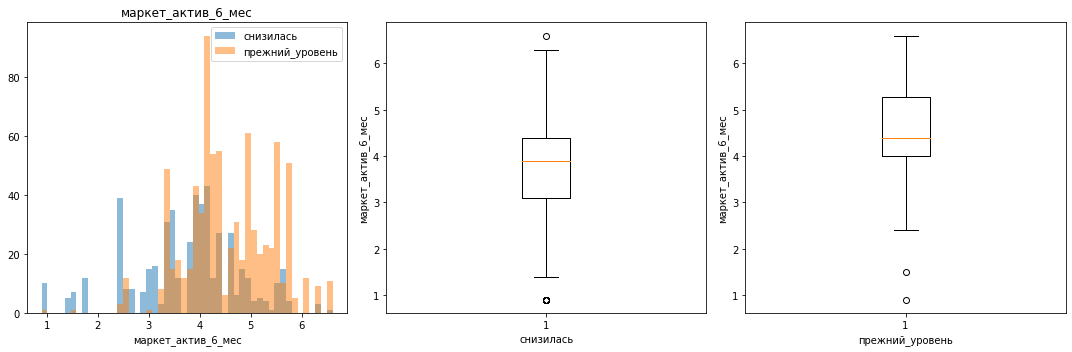

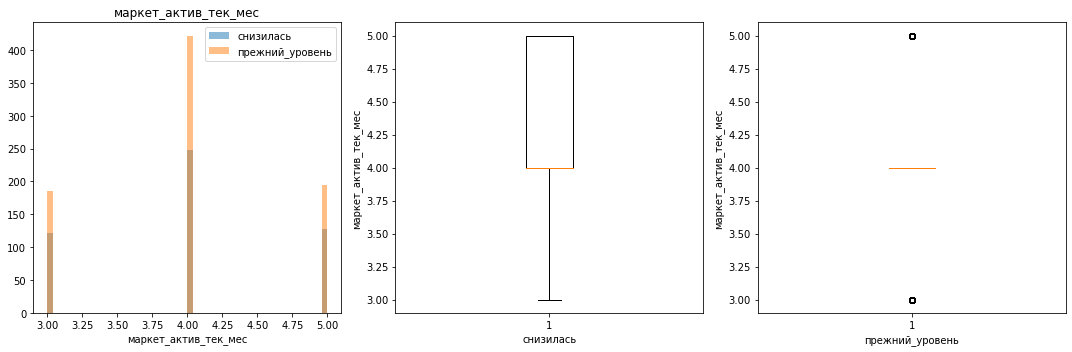

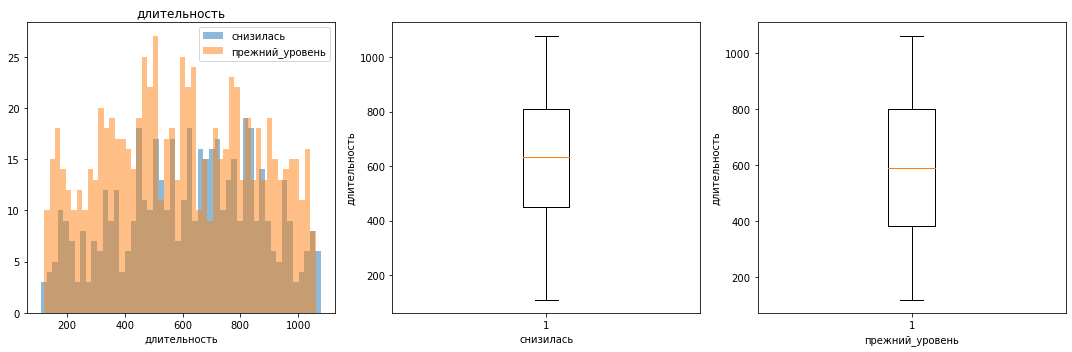

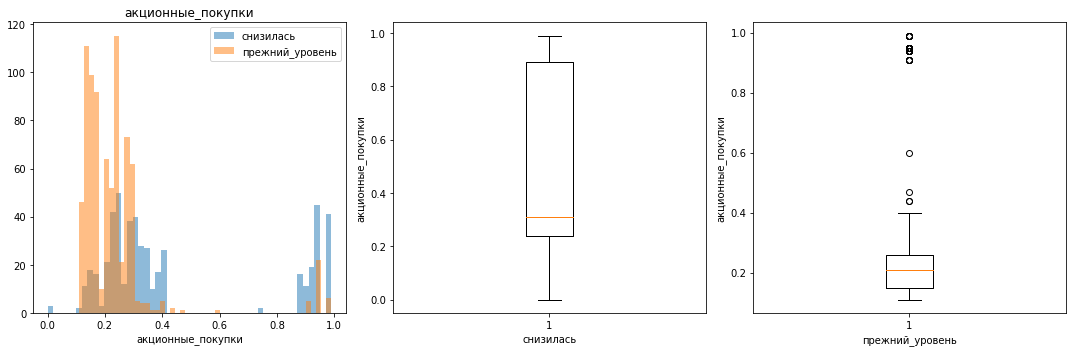

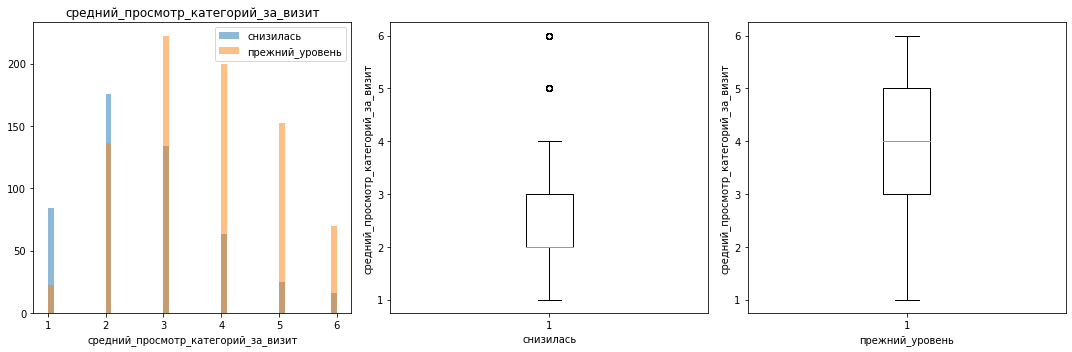

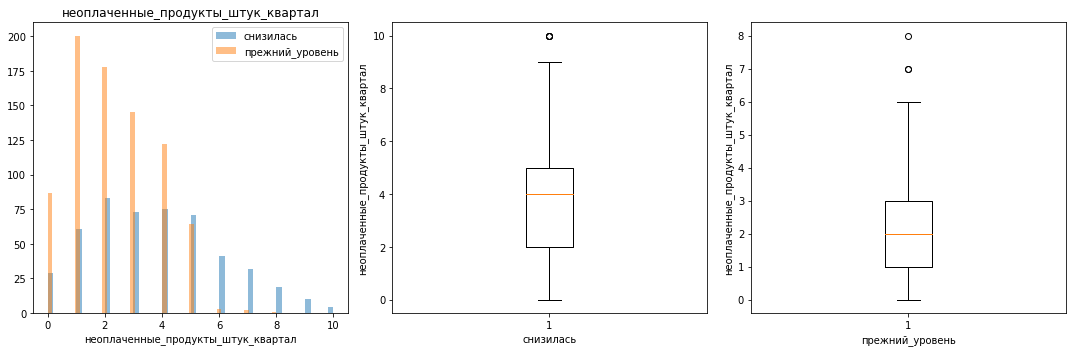

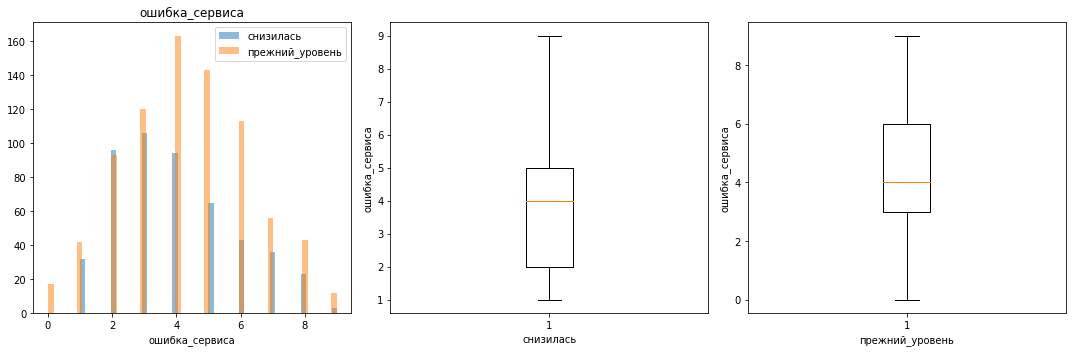

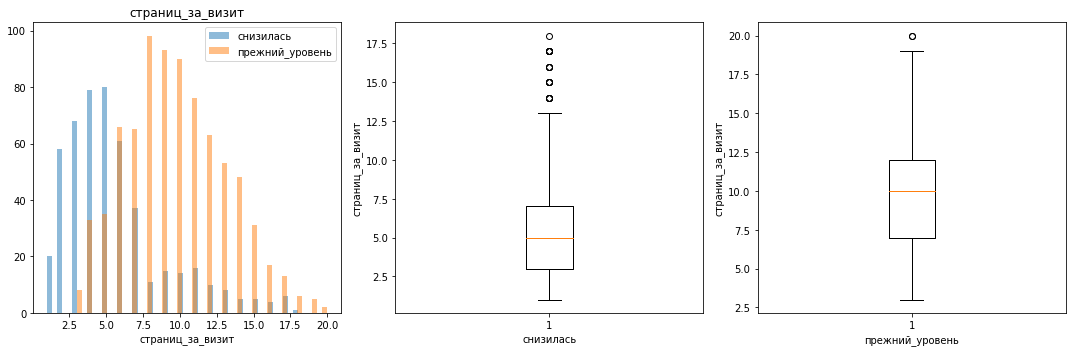

In [42]:
for it in num_col:
    drawHistBoxplot(it) 

<b>Строим диаграммы и гистограммы, которые описывают все категориальные признаки таблицы market_file.</b>

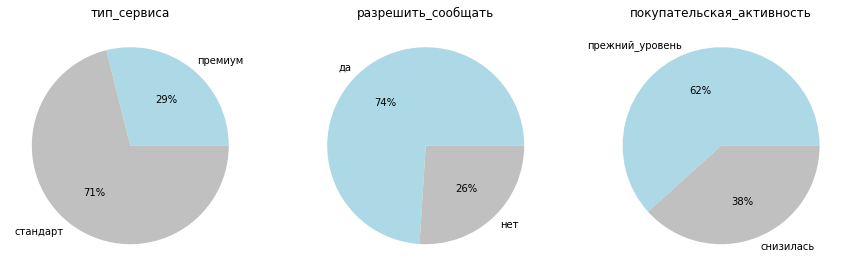

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

market_file.groupby('тип_сервиса')['тип_сервиса'].count().plot(ax=axes[0], 
                                                               kind='pie',
                                                               autopct='%1.0f%%',
                                                               colors = ['lightBlue',  'silver'],
                                                               title='тип_сервиса',
                                                               label='');
market_file.groupby('разрешить_сообщать')['разрешить_сообщать'].count().plot(ax=axes[1], 
                                                                             kind='pie',
                                                                             autopct='%1.0f%%',
                                                                             colors = ['lightBlue',  'silver'],
                                                                             title='разрешить_сообщать',
                                                                             label='');
market_file.groupby('покупательская_активность')['покупательская_активность'].count().plot(ax=axes[2], 
                                                                             kind='pie',
                                                                             autopct='%1.0f%%',
                                                                             colors = ['lightBlue',  'silver'],
                                                                             title='покупательская_активность',
                                                                             label='');

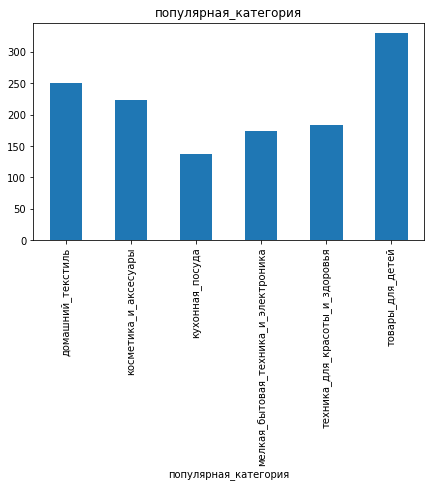

In [44]:
market_file.groupby('популярная_категория')['популярная_категория'].count().plot( kind='bar',
                                                                                 figsize=(7,4),
                                                                                 title='популярная_категория',
                                                                                 label='');

<b>Строим гистограммы и 'ящики с усами' для таблиц market_money, market_time, money.</b>

In [45]:
 def drawHistBoxplot(val, label) :
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(label)
   
    ax1.hist(val, bins=50)
    ax1.set(xlabel=label, ylabel='Количество')
    
    ax2.boxplot(val)
    ax2.set(ylabel=label)

    fig.tight_layout()
    plt.show()

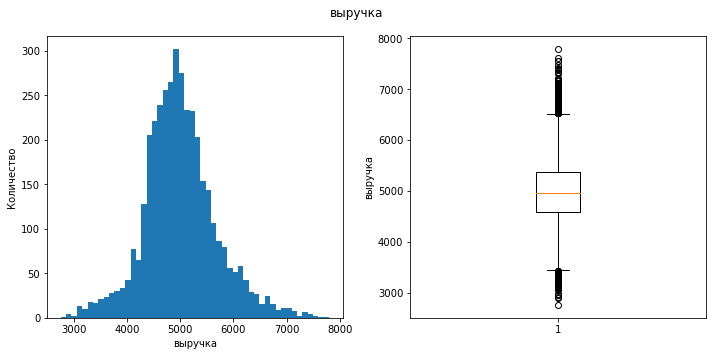

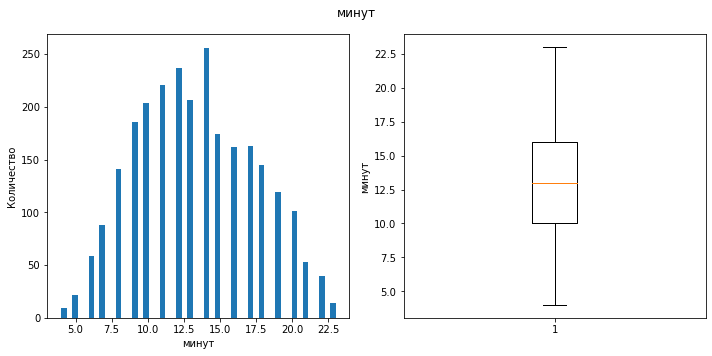

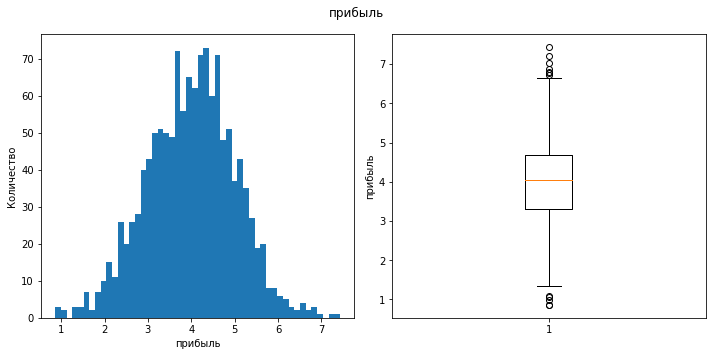

In [46]:
drawHistBoxplot(market_money['выручка'], 'выручка')
drawHistBoxplot(market_time['минут'], 'минут')
drawHistBoxplot(money['прибыль'], 'прибыль')

####   Клиенты с покупательской активностью не менее трёх месяцев  

In [47]:
list_del_id = []
for i in market_money['id'] :
    p = market_money[market_money['id']==i]['период_зафиксирована_выручка'] 
   
    if p.count() <= 2 :
        list_del_id.append(i)

list_del_id = list(set(list_del_id))    # список клиентов с покупательской активностью не менее трёх месяцев    

In [48]:
regular_users = market_file
regular_users_money = market_money
regular_users_time = market_time
regular_money = money
for el in list_del_id :
    regular_users = regular_users[market_file['id'] != el]
    regular_users_money = regular_users_money[market_money['id'] != el]
    regular_users_time = regular_users_time[market_time['id'] != el]   

<a id='merge_tables'></a>
#### Объединение таблиц market_file.csv, market_money.csv, market_time.csv

In [49]:
regular_users_money_transp = regular_users_money.pivot(index='id',
                                                columns='период_зафиксирована_выручка',
                                                values='выручка')

In [50]:
data = regular_users.merge(regular_users_money_transp, how='right', left_on='id', right_on='id')

In [51]:
data = data.rename( columns={'предыдущий_месяц':'предыдущий_выручка',
                             'препредыдущий_месяц':'препредыдущий_выручка',
                             'текущий_месяц':'текущий_выручка'})

In [52]:
regular_users_time_transp = regular_users_time.pivot(index='id',
                                                columns='период_фиксир_общее_время',
                                                values='минут')

In [53]:
data = data.merge(regular_users_time_transp, how='right', left_on='id', right_on='id')

In [54]:
data = data.rename( columns={'предыдущий_месяц':'предыдущий_время', # предыдущий_мес_
                             'текущий_месяц':'текущий_время'})   # текущий_мес_

In [55]:
data.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_выручка,препредыдущий_выручка,текущий_выручка,предыдущий_время,текущий_время
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [56]:
data = data.set_index('id')

<a id='distribution_target'></a>
#### Распределение целевой переменной

In [57]:
market_file['покупательская_активность'].value_counts(normalize=True)

покупательская_активность
прежний_уровень    0.616923
снизилась          0.383077
Name: proportion, dtype: float64

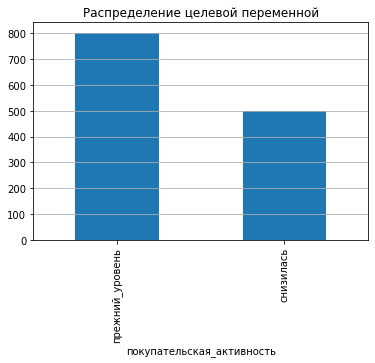

In [58]:
market_file['покупательская_активность'].value_counts().plot.bar(figsize=(6, 4))
plt.title('Распределение целевой переменной')
plt.grid(axis='y')

    **baseline** качества равна 62%

<a id='corr_analysis'></a>
#### Корреляционный анализ

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'предыдущий_выручка', 'препредыдущий_выручка', 'текущий_выручка', 'предыдущий_время', 'текущий_время']


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

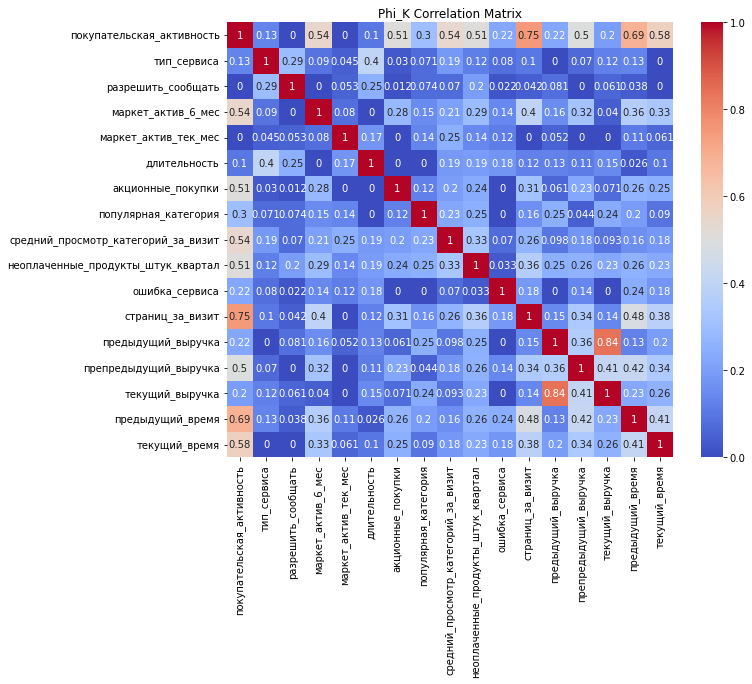

In [59]:
# Вычисление матрицы корреляции с использованием phik
corr_matrix = data.phik_matrix()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

Мультиколлиниарности между признаками нет. 

##### Перекодируем целевую

In [60]:
data['покупательская_активность'] = data['покупательская_активность'].apply(
                                                    lambda x: 1 if x=='снизилась' else 0)

<a id='use_pipeline'></a>
### Использование пайплайнов

In [61]:
def separationData(df, target) :

    X = df.drop([target], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state = RANDOM_STATE,
                                                   test_size = TEST_SIZE,
                                                   stratify = data[target] # сохранить пропорцию классов
                                                   )   
    
# визуализация баланса целевого признака в выборках
    fig, ax = plt.subplots(1,3, figsize=(12,4))

    y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
    ax[0].set_title("Исходный датасет")

    y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
    ax[1].set_title("Train")

    y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
    ax[2].set_title("Test")
    plt.show()
    return X_train, X_test, y_train, y_test

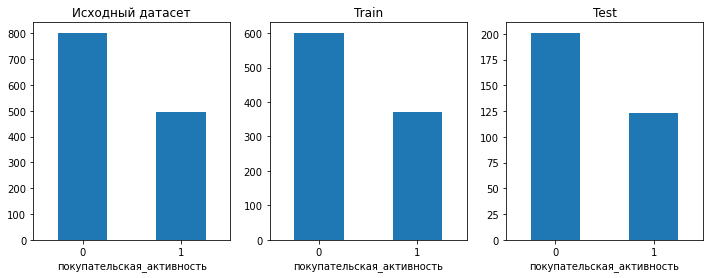

In [62]:
X_train, X_test, y_train, y_test = separationData(data, 'покупательская_активность')

In [63]:
ohe_columns = [ 'тип_сервиса', 
                'разрешить_сообщать', 
                'популярная_категория' ]

num_columns = list(data.columns)
for it in ohe_columns:
    if it in num_columns:
        num_columns.remove(it)
        
num_columns.remove('покупательская_активность') # удаляем название столбца с целевым признаком

### Cоздаём пайплайн 

In [64]:
# создаём пайплайн для подготовки признаков 
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

In [65]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
     
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [66]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

#### Словарь с гиперпараметрами

In [67]:
param_distributions = [
# словарь для модели KNeighborsClassifier() 
     {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
# словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
# словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
# словарь для модели SVC()    
    {
            'models': [SVC(random_state=RANDOM_STATE, probability=True)],
            'models__C': [0.01, 0.1, 1, 10, 100],
            'preprocessor__num': [MinMaxScaler(),  StandardScaler(), 'passthrough']
    },
# словарь для модели RF
   {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'preprocessor__ohe':[
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        ],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50,301,50),
        'models__max_depth': range(8,21,3)
   }
] 

#### GridSearchCV

In [68]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_distributions, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train) 

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/yulia/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['тип_сервиса',
                                                                          'разрешить_сообщать',
                                                                          'популярная_категория']),
                                                                        ('num',
                                                                         MinMax...
                                                'passthrough']},
                         {'models': [RandomForestClassifier(random_state=42)],
                          'models__max_depth': range(8, 21, 3),
                          'models__n_estimators': range(50, 301, 50),
                          'preprocessor__num': ['passthrough'],
                          'preprocessor__ohe': [OrdinalEncoder(handle_unknown='use_encoded_value',
                                                               unknown_value=-1),
                                                OneHotEncoder(drop='first',
                                                              handle_unknown='ignore',
                                                              sparse_output=False)]}],
             scoring='roc_auc')

<a id='best_model'></a>
#### Лучшая модель

In [69]:
print('Лучшая модель и её параметры:\n', grid.best_estimator_.named_steps['models']) 
print('\nМетрика ROC-AUC для лучшей модели:\n', grid.best_score_ )

Лучшая модель и её параметры:
 RandomForestClassifier(max_depth=11, n_estimators=50, random_state=42)

Метрика ROC-AUC для лучшей модели:
 0.9151872359963269


In [70]:
grid.best_params_

{'models': RandomForestClassifier(random_state=42),
 'models__max_depth': 11,
 'models__n_estimators': 50,
 'preprocessor__num': 'passthrough',
 'preprocessor__ohe': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)}

#### Прогноз на тестовых данных

In [71]:
y_preds = grid.predict(X_test)
# вероятности предсказаний
probas = grid.predict_proba(X_test)[:,1]

In [72]:
acc = accuracy_score(y_test, y_preds)
print('Accuracy =', round(acc,2))

recall = recall_score(y_test, y_preds)
print('Recall =', round(recall,2))

precision = precision_score(y_test, y_preds)
print('Precision =', round(precision,2))

f1 = f1_score(y_test, y_preds, pos_label=1)
print('F1-score =', round(f1,2))

roc = roc_auc_score(y_test, probas)
print('ROC-AUC =', round(roc,2))

Accuracy = 0.91
Recall = 0.8
Precision = 0.96
F1-score = 0.87
ROC-AUC = 0.91


    Precision = 0.96 модель в 96% случаев присваивает класс 1('снизилась') без ошибок.
    Recall = 0.8 модель в 80%  не пропускает объекты класса 1('снизилась').
    ROC-AUC = 0.91 показывает, что модель хорошо разделяет классы и имеет высокую способность различать положительные и отрицательные случаи, что важно, потому что изначально выборки были несбалансированы.

In [73]:
# FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, probas)

# порог, соответствующий лучшей производительности ROC-AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]

print('Best Threshold =', round(best_threshold,2))

Best Threshold = 0.44


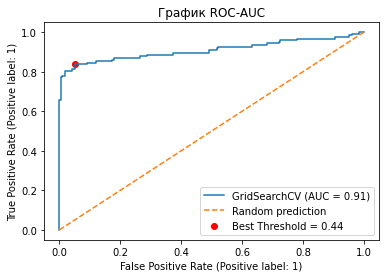

In [74]:
RocCurveDisplay.from_estimator(grid, X_test, y_test);
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction');
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)],
            marker='o', color='r', label=f'Best Threshold = {round(best_threshold,2)}');
plt.title("График ROC-AUC")
plt.legend()
plt.show()

    Порог вероятности Threshold=0.44, при котором TPR(доля верных предсказаний 'снизится') будет близко к единице, при этом FPR(долю неверных предсказаний 'прежний уровень')  на самом нижнем из возможных уровней.
    
    Чем ближе значение ROC-AUC к 1, тем лучше качество модели.  ROC-AUC = 0.91 говорит о том, что модель демонстрирует хорошую способность к классификации.

<a id='analysis_importance_of_features'></a>   
### Интерпретируемость модели</a>

In [75]:
best_model = grid.best_estimator_
rf_model =  best_model.named_steps['models']
all_cols = X_test.columns

In [76]:
X_train_new = best_model.named_steps['preprocessor'].transform(X_train)
X_test_new = best_model.named_steps['preprocessor'].transform(X_test)
X_test_df = pd.DataFrame(X_test_new, columns = [X_test.columns])

#### Анализ важности признаков методом SHAP

PermutationExplainer explainer: 325it [00:49,  5.41it/s]                        


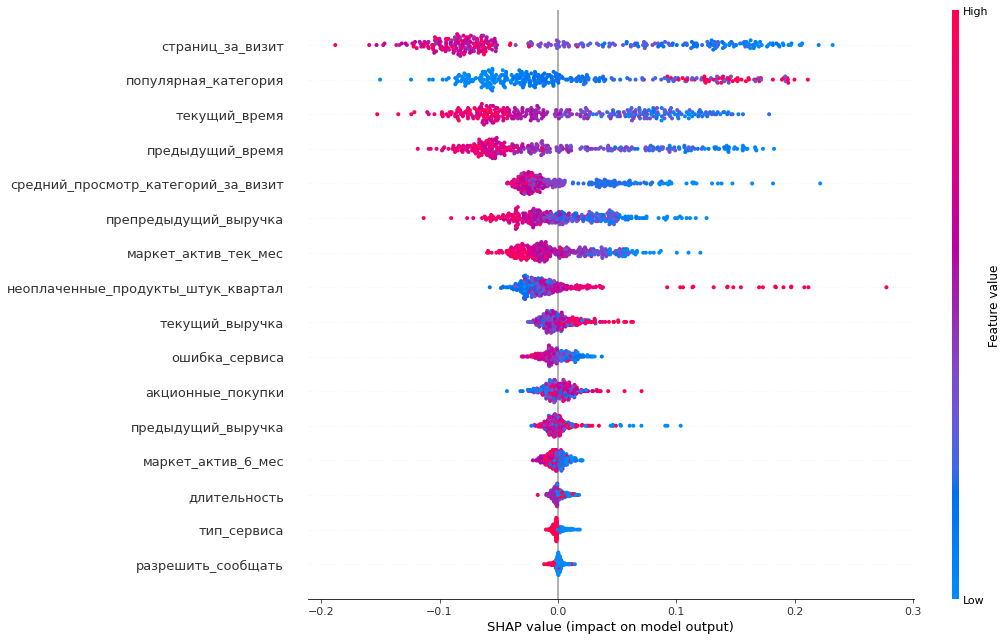

In [77]:
explainer = shap.Explainer(rf_model.predict_proba, X_train_new)
shap_values = explainer(X_test_df)
shap.initjs()
shap.summary_plot(shap_values[:, :, 1], X_test_df, plot_type="dot",
                 feature_names=all_cols, show=True, plot_size=(15,9))

- значения слева от центральной вертикальной линии — это 'прежний уровень' (0), справа — 'снизилась' (1)
- чем толще линия на графике, тем больше там точек наблюдения с близкими значениями Шепли
- чем краснее точки на графике, тем выше значения признака в ней

Из графика видно, что клиенты с прежним уровнем покупательской способностью
- посещают много страниц за визит
- предпочитают покупают товары разных категорий
- проводят много времени на сайте
- используют рекламмные рассылки и звонки 
- просматривают страницы с несколькими категориями товаров

<a id='conclusion'></a>
### Выводы:

<b>Лучшая модель:</b>  
### RandomForestClassifier
с гиперпараметрами 
               max_depth = 11, 
               estimators = 50,
               OrdinalEncoder.

<br>Метрики показывают хороший результат работы модели:</br>
<br><b>Accuracy</b> = 0.91</br>
<br><b>Recall</b> = 0.8</br>
<br><b>Precision</b> = 0.96</br>
<br><b>F1-score</b> = 0.87</br>
<br><b>ROC-AUC</b> = 0.91</br>

<b>Интерпритация модели:</b>
    
    - Чем больше страниц клиент посещает за сеанс, тем вероятнее что его покупательская активность останется на прежнем уровне 
    - Чем больше проведенного времени в текущем и предыдущем месяце у клиента, тем вероятнее его покупательская активность останется на прежнем уровне. 
    - Чем больше просмотров , категорий за визит, тем вероятнее покупательская активность останется на прежнем уровне. 
    - Чем больше маркетинговой активность в пользу клиента тем вероятнее его покупательская активность останется на прежнем уровне 
    - Покупательская активность клиента будет снижаться, тем сильнее, чем больше в его корзине будет неоплаченных товаров.
    

<b>Из  результатов, описанных выше, можно сделать несколько предложений для бизнес-решений:</b>

    1. Внешний вид и работа сайта
    Стоит уделить внимание внешнему виду сайта и поддержанию его хорошей работоспособности. 
    Было бы полезно добавить новый функционал, который позволит увеличить активность клиента на сайте.
    Пользователь должен проводить как можно больше времени на сайте, тогда его покупательская активность остаётся на прежнем уровне. 
   
    2. Маркетинговые коммуникации компании
    Маркетинговая активность положительно влияет на покупательскую активность клиентов, поэтому стоит увеличить инвестиций в маркетинг, что позволит у большого числа клиентов уровень покупательской активности оставить на прежнем уровне. Необходимо увеличить рекламу, рассылки, звонки.

    3. Товары в корзине
    Неоплаченные товары в корзине повышают вероятность снижения покупательской активности. Избежать подобной ситуации можно, путем предоставления скидки на товары в корзине в течение ограниченного времени. Добавить напоминания о незавершённом заказе.
    
    4. Просмотр различных категорий за визит.
    Просмотр большего количества категорий товаров за визит увеличивает вероятность того, что покупательская активность останется на прежнем уровне. Стоит улучшить таргетированную рекламу. 
